In [1]:
import numpy as np

def is_inside_existing_spheres(point, centers, radius):
    """指定された点が既存の球の中にあるかを確認する関数"""
    for center in centers:
        distance = np.linalg.norm(np.array(center) - np.array(point))
        if distance < 2 * radius:
            return True
    return False

def find_maximum_spheres(cube_size, radius, max_iterations=10000):
    """指定された立方体の中に最大数の球を配置する関数"""
    sphere_centers = []
    
    for _ in range(max_iterations):
        # 立方体の中にランダムに点を配置
        random_point = [np.random.randint(radius, cube_size - radius),
                        np.random.randint(radius, cube_size - radius),
                        np.random.randint(radius, cube_size - radius)]
        
        # その点が既存の球の中にない場合、新しい球の中心として追加
        if not is_inside_existing_spheres(random_point, sphere_centers, radius):
            sphere_centers.append(random_point)
    
    return sphere_centers

# 10回繰り返して、配置可能な球の数が最大のものを選択
mesh =50
r =8
N = 50
num_centers = []
best_centers = []
best_count = 0
for _ in range(N):
    current_centers = find_maximum_spheres(mesh,r)
    if len(current_centers) > best_count:
        best_count = len(current_centers)
        best_centers = current_centers
    num_centers.append(len(best_centers))
print(len(best_centers))
print(best_centers)


16
[[33, 40, 14], [8, 26, 25], [33, 14, 26], [25, 35, 35], [23, 13, 41], [14, 32, 9], [15, 13, 12], [41, 31, 25], [14, 8, 28], [8, 36, 40], [41, 11, 40], [30, 23, 11], [40, 28, 41], [40, 9, 11], [15, 41, 23], [8, 20, 41]]


In [2]:
num_centers

[14,
 14,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16]

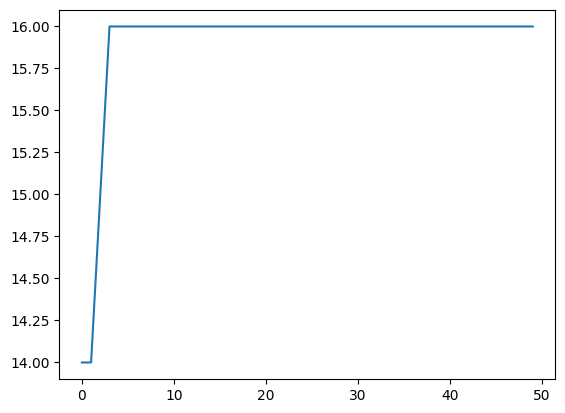

In [3]:
import matplotlib.pyplot as plt
x = []
for i in range(len(num_centers)):
    x.append(i)
y = num_centers
plt.plot(x,y)

In [4]:
path ="initial_shape"

with open(path) as f:
    initial_data= f.readlines()
    

In [5]:
initial_data_1 = [list(s.rstrip()) for s in initial_data]
#initial_data_1[3]

In [6]:
bone = [[[1]*mesh]*mesh]*mesh

In [7]:
t =""
for i in range(mesh):
    t+= "9"
plate =[]
for i in range(mesh):
    plate.append(t)    

In [8]:
t =""
for i in range(mesh):
    t+= "1"
bone = []
for i in range(mesh*mesh):
    bone.append(t)

for i in range(len(best_centers)):
    x =[]
    x = list(bone[50*(best_centers[i][0]-1)+(best_centers[i][1]-1)])
    x[best_centers[i][2]-1] = "2"
    print("".join(x))
    print(best_centers[i][0]-1)
    bone[50*(best_centers[i][0]-1)+(best_centers[i][1]-1)] = "".join(x)

11111111111112111111111111111111111111111111111111
32
11111111111111111111111121111111111111111111111111
7
11111111111111111111111112111111111111111111111111
32
11111111111111111111111111111111112111111111111111
24
11111111111111111111111111111111111111112111111111
22
11111111211111111111111111111111111111111111111111
13
11111111111211111111111111111111111111111111111111
14
11111111111111111111111121111111111111111111111111
40
11111111111111111111111111121111111111111111111111
13
11111111111111111111111111111111111111121111111111
7
11111111111111111111111111111111111111121111111111
40
11111111112111111111111111111111111111111111111111
29
11111111111111111111111111111111111111112111111111
39
11111111112111111111111111111111111111111111111111
39
11111111111111111111112111111111111111111111111111
14
11111111111111111111111111111111111111112111111111
7


In [9]:
len(bone)

2500

In [10]:
shape_path ="initial_shape_1"
with open(shape_path,mode = "w") as fw:
    fw.write(initial_data[0].replace("0.15000000D-01","1000.0d-3"))
    fw.write(initial_data[1].replace("53","50").replace("26","50"))  
    
    for i in range(3):
        fw.write("%  "+ str(i+1)+ "\n")
        for j in range(mesh):
            s = plate[j]+ "\n"
            fw.write(s)
    for i in range(mesh):
        fw.write("%  "+ str(i+4)+ "\n")
        for j in range(mesh):
            s = bone[50*(i-1)+(j-1)]+ "\n"
            fw.write(s)
    for i in range(3):
        fw.write("%  "+ str(i+54)+ "\n")
        for j in range(mesh):
            s = plate[j]+ "\n"
            fw.write(s)

with open(shape_path,mode = "r") as f:
        print(f.read())

Unit Element Size :   1000.0d-3   Shape_type : 1
   Mesh :    50 X    50 X    56    0   Thickness_of_plate :     0    0    3
%  1
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
99999999999999999999999999999999999999999999999999
999

In [11]:
bound_path = "boundary_condition"
with open(bound_path,mode = "r") as f:
        bound_data =f.readlines()

In [12]:
pi = 3.14159265358979323846
r_ideal = 6.00
nx_dp = 50
ny_dp = 50
load_tra = 20
load_plate = ((pi * r_ideal**2.0) / (nx_dp*ny_dp)) * load_tra
bound_data[0].replace("0.15000000D-01","1000.0d-3").replace("0.70685835D-01",str(load_plate))

NBOUV = 51*51*2 

In [35]:
bound_path = "boundary_condition_1"
with open(bound_path,mode = "w") as fw:
    fw.write(bound_data[0].replace("0.15000000D-01","1000.0d-3").replace("0.70685835D-01",str(load_plate)))
    fw.write(bound_data[1].replace("53","50").replace("26","50")) 
    fw.write(bound_data[2])
    fw.write(bound_data[3].replace("2916",str(NBOUV)))
    fw.write(bound_data[4]) 
    i = 1
    for j in range(mesh+1):
        for k in range(mesh+1):
            fw.write("   "+" "*(5-len(str(i)))+str(i)+" "*(5-len(str(k)))+str(k)+" "*(4-len(str(j)))+str(j)+"   0    1   1   0   0.00000000D+00  0.00000000D+00  0.37500000D-03\n")
            i += 1
    for j in range(mesh+1):
        for k in range(mesh+1):
            fw.write("   "+" "*(5-len(str(i)))+str(i)+" "*(5-len(str(k)))+str(k)+" "*(4-len(str(j)))+str(j)+"  56    1   1   0   0.00000000D+00  0.00000000D+00 -0.37500000D-03\n") 
            i += 1


In [33]:
bound_path = "boundary_condition_1"
with open(bound_path,mode = "r") as fw:
    x = fw.readlines()

In [34]:
len(x)

5207